# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),  
  送入繪圖前的除了排序外, 還要注意什麼? (In[5])
- 如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [4]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個點 (得到 10 組)
"""
Your Code Here
"""
bin_cut = 25
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(38.015, 39.959]    17220
(36.071, 38.015]    16993
(39.959, 41.903]    16567
(41.903, 43.847]    16157
(30.238, 32.182]    15813
(32.182, 34.127]    15140
(28.294, 30.238]    15030
(34.127, 36.071]    15022
(43.847, 45.791]    14686
(53.568, 55.512]    14188
(45.791, 47.735]    14059
(26.35, 28.294]     13924
(51.624, 53.568]    13523
(47.735, 49.679]    13216
(55.512, 57.456]    13203
(49.679, 51.624]    12739
(57.456, 59.4]      12517
(59.4, 61.344]      12202
(61.344, 63.288]    10540
(63.288, 65.232]     9750
(24.406, 26.35]      8085
(22.462, 24.406]     7228
(65.232, 67.176]     4580
(67.176, 69.121]     2590
(20.469, 22.462]     2539
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(24.406, 26.35]"
1,0,16765,45.931507,"(45.791, 47.735]"
2,0,19046,52.180822,"(51.624, 53.568]"
3,0,19005,52.068493,"(51.624, 53.568]"
4,0,19932,54.608219,"(53.568, 55.512]"


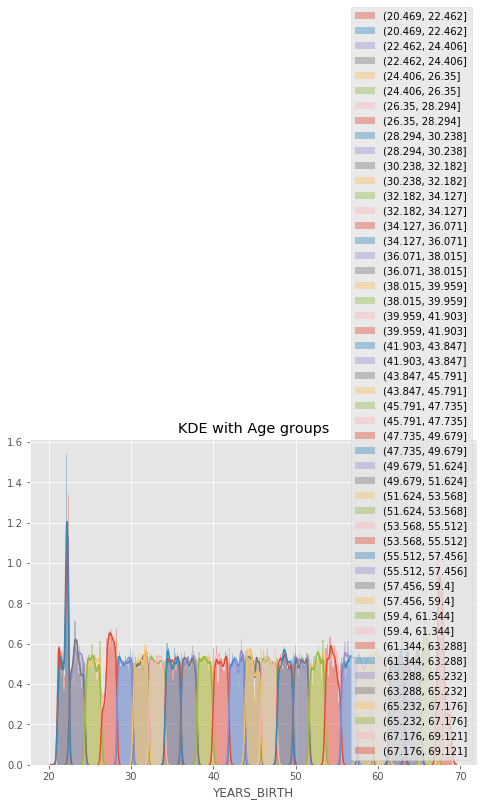

In [5]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group = age_data.groupby(by = 'YEARS_BINNED')
year_group_sorted = list(year_group.groups)

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.legend()
plt.show()

In [6]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.469, 22.462]",0.125246,7985.700670,21.878632
"(22.462, 24.406]",0.128251,8564.200055,23.463562
"(24.406, 26.35]",0.103401,9269.269388,25.395259
"(26.35, 28.294]",0.115125,10015.352700,27.439322
"(28.294, 30.238]",0.111444,10680.078510,29.260489
"(30.238, 32.182]",0.105989,11396.757541,31.223993
"(32.182, 34.127]",0.098811,12097.544716,33.143958
"(34.127, 36.071]",0.098189,12812.734523,35.103382
"(36.071, 38.015]",0.091685,13522.547049,37.048074


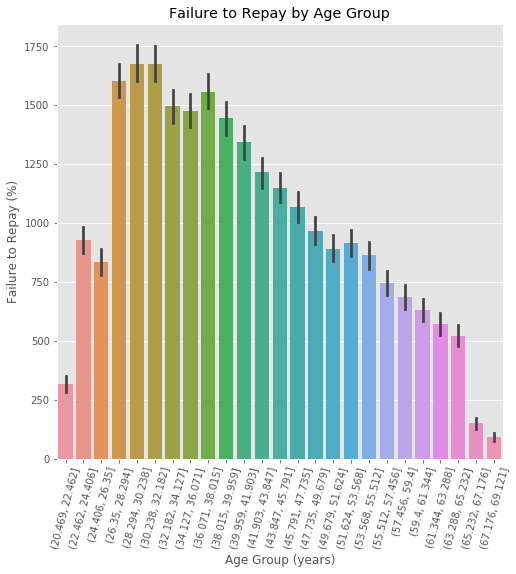

In [7]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_data['YEARS_BINNED']
py = age_data['TARGET']
sns.barplot(px, py,estimator=sum)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');